# DATA CLEANING AND FEATURE ENGINEERING
---

Install required libraries

In [1]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 3.2MB/s 


Import essential libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import keras 
from keras.layers import *
from keras.optimizers import *
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding
from sklearn.preprocessing import OneHotEncoder
sb.set() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Adjust the path accordingly

In [3]:
PATH = ''

In [4]:
X = pd.read_csv(PATH + 'train_values.csv')
y = pd.read_csv(PATH + 'train_labels.csv')
test = pd.read_csv(PATH + 'test_values.csv')

In [5]:
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


### Check for null values

In [8]:
def get_nulls(X):
    dtypes=pd.DataFrame(X.dtypes,columns=["Data Type"])
    dtypes["Unique Values"]=X.nunique()
    dtypes["Null Values"]=X.isnull().sum()
    dtypes["% of null Values"]=X.isnull().sum()/len(X)
    return dtypes

Train data

In [9]:
X_null = get_nulls(X)
X_null

,Data Type,Unique Values,Null Values,% of null Values
building_id,int64,260601,0,0.0
geo_level_1_id,int64,31,0,0.0
geo_level_2_id,int64,1414,0,0.0
geo_level_3_id,int64,11595,0,0.0
count_floors_pre_eq,int64,9,0,0.0
age,int64,42,0,0.0
area_percentage,int64,84,0,0.0
height_percentage,int64,27,0,0.0
land_surface_condition,object,3,0,0.0
foundation_type,object,5,0,0.0


Test data

In [10]:
test_nulls = get_nulls(test)
test_nulls

,Data Type,Unique Values,Null Values,% of null Values
building_id,int64,86868,0,0.0
geo_level_1_id,int64,31,0,0.0
geo_level_2_id,int64,1364,0,0.0
geo_level_3_id,int64,10213,0,0.0
count_floors_pre_eq,int64,8,0,0.0
age,int64,36,0,0.0
area_percentage,int64,73,0,0.0
height_percentage,int64,28,0,0.0
land_surface_condition,object,3,0,0.0
foundation_type,object,5,0,0.0


---
### Target encode the categorical variables

In [11]:
def target_encode_multiclass(X, y, X_test): #X,y are pandas df and series
    y_copy = y.copy()
    y_copy = y_copy.astype(str)   #convert to string to onehot encode
    enc = ce.OneHotEncoder().fit(y_copy)
    y_onehot = enc.transform(y_copy)
    class_names=y_onehot.columns  #names of onehot encoded columns
    X_obj=X.select_dtypes('object') #separate categorical columns
    X=X.select_dtypes(exclude='object') 
    X_obj_test=X_test.select_dtypes('object') #separate categorical columns
    X_test=X_test.select_dtypes(exclude='object') 

    for class_ in class_names:
        enc=ce.TargetEncoder()
        enc.fit(X_obj,y_onehot[class_]) #convert all categorical 
        temp=enc.transform(X_obj)       #columns for class_
        temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
        X=pd.concat([X,temp],axis=1)    #add to original dataset
        temp_test=enc.transform(X_obj_test)       #columns for class_
        temp_test.columns=[str(x)+'_'+str(class_) for x in temp_test.columns]
        X_test=pd.concat([X_test,temp_test],axis=1)    #add to original dataset
      
    return X, X_test

In [12]:
y_copy = y.copy()
y_copy.drop(columns=['building_id'], inplace=True, axis=1)
X_enc, test_enc = target_encode_multiclass(X, y_copy, test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
X_enc.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_damage_grade_1,foundation_type_damage_grade_1,roof_type_damage_grade_1,ground_floor_type_damage_grade_1,other_floor_type_damage_grade_1,position_damage_grade_1,plan_configuration_damage_grade_1,legal_ownership_status_damage_grade_1,land_surface_condition_damage_grade_2,foundation_type_damage_grade_2,roof_type_damage_grade_2,ground_floor_type_damage_grade_2,other_floor_type_damage_grade_2,position_damage_grade_2,plan_configuration_damage_grade_2,legal_ownership_status_damage_grade_2,land_surface_condition_damage_grade_3,foundation_type_damage_grade_3,roof_type_damage_grade_3,ground_floor_type_damage_grade_3,other_floor_type_damage_grade_3,position_damage_grade_3,plan_configuration_damage_grade_3,legal_ownership_status_damage_grade_3
0,802906,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.390106,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.594862,0.529187,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.080707,0.093213,0.092732
1,28830,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.361472,0.378479,0.343728,0.333199,0.360445,0.327438,0.336859,0.336795,0.566138,0.572615,0.58218,0.584315,0.594862,0.574254,0.569928,0.570473,0.072391,0.048906,0.074091,0.082486,0.044693,0.098308,0.093213,0.092732
2,94947,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.376243,0.390106,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.544858,0.529187,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.078899,0.080707,0.093213,0.092732
3,590882,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.376243,0.327438,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.544858,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.078899,0.098308,0.093213,0.092732
4,201944,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.376243,0.327438,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.544858,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.078899,0.098308,0.093213,0.092732


In [14]:
test_enc.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_damage_grade_1,foundation_type_damage_grade_1,roof_type_damage_grade_1,ground_floor_type_damage_grade_1,other_floor_type_damage_grade_1,position_damage_grade_1,plan_configuration_damage_grade_1,legal_ownership_status_damage_grade_1,land_surface_condition_damage_grade_2,foundation_type_damage_grade_2,roof_type_damage_grade_2,ground_floor_type_damage_grade_2,other_floor_type_damage_grade_2,position_damage_grade_2,plan_configuration_damage_grade_2,legal_ownership_status_damage_grade_2,land_surface_condition_damage_grade_3,foundation_type_damage_grade_3,roof_type_damage_grade_3,ground_floor_type_damage_grade_3,other_floor_type_damage_grade_3,position_damage_grade_3,plan_configuration_damage_grade_3,legal_ownership_status_damage_grade_3
0,300051,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.327438,0.336859,0.336795,0.563151,0.572615,0.582180,0.571880,0.594862,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.098308,0.093213,0.092732
1,99355,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.327438,0.336859,0.336795,0.563151,0.572615,0.582180,0.571880,0.594862,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.098308,0.093213,0.092732
2,890251,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.327438,0.336859,0.336795,0.563151,0.572615,0.582180,0.571880,0.594862,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.098308,0.093213,0.092732
3,745817,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0.335509,0.378479,0.045047,0.053389,0.265919,0.390106,0.336859,0.336795,0.563151,0.572615,0.482173,0.527427,0.511056,0.529187,0.569928,0.570473,0.101339,0.048906,0.472780,0.419184,0.223025,0.080707,0.093213,0.092732
4,421793,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.383932,0.368612,0.360445,0.390106,0.336859,0.336795,0.563151,0.572615,0.552309,0.571880,0.594862,0.529187,0.569928,0.570473,0.101339,0.048906,0.063759,0.059508,0.044693,0.080707,0.093213,0.092732


In [15]:
print('train shape: ', X_enc.shape)
print('test shape: ', test_enc.shape)

train shape:  (260601, 55)
test shape:  (86868, 55)


---
### Create new features using PloynomialFeatures

In [16]:
from sklearn.preprocessing import PolynomialFeatures

numeric = pd.DataFrame(X_enc[["age",
                                "area_percentage",
                                "height_percentage"]])

poly = PolynomialFeatures(2)
numeric_poly = poly.fit_transform(numeric)

numeric_test = pd.DataFrame(test_enc[["age",
                                "area_percentage",
                                "height_percentage",]])

numeric_test_poly = poly.transform(numeric_test)

In [17]:
df_train = pd.DataFrame(numeric_poly, columns=poly.get_feature_names(numeric.columns))
df_test = pd.DataFrame(numeric_test_poly, columns=poly.get_feature_names(numeric_test.columns))

In [18]:
cols_to_use = df_train.columns.difference(X_enc.columns)

X_eng = pd.merge(X_enc, df_train[cols_to_use], left_index=True, right_index=True, how='outer')
test_eng = pd.merge(test_enc, df_test[cols_to_use], left_index=True, right_index=True, how='outer')

---
### Drop meaningless columns 

In [19]:
X_eng.drop(columns=['building_id'], inplace=True, axis=1)
y.drop(columns=['building_id'], inplace=True, axis=1)

---
### Check for outiers using Isolation Forest

In [20]:
def show_outliers(X, clf, axis_one, axis_two):
    outliers = clf.predict(X)
    sb.scathttp://localhost:8888/notebooks/Desktop/Richter's%20Predictor%20Modeling%20Earthquake%20Damage/NoteBooks/DataCleaning.ipynb#terplot(X[axis_one], X[axis_two], outliers, palette='Set1', legend=False)

In [21]:
def get_outlier_score(X, clf):
    col_name = 'outlier_score'
    X[col_name] = model.decision_function(X)
    return X

In [22]:
model = IsolationForest().fit(X_eng)

Train data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


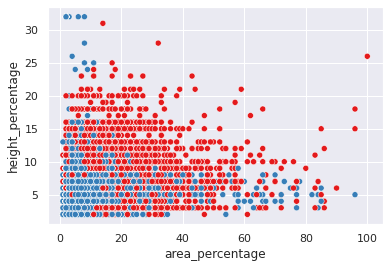

In [23]:
show_outliers(X_eng, model, "area_percentage", "height_percentage")

Test data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


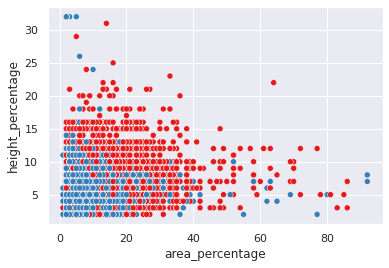

In [24]:
show_outliers(test_eng.drop(columns=['building_id'], inplace=False, axis=1), model, "area_percentage", "height_percentage")

### Inference
Lot of outliers in the dataset. It doesn't make sense to remove them as even the test data has many outliers. Instead we could create a new feature that gives a outlier score for each data point

In [25]:
X_iso = get_outlier_score(X_eng, model)
test_iso = get_outlier_score(test_eng.drop(columns=['building_id'], inplace=False, axis=1), model)

In [26]:
X_iso.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_damage_grade_1,foundation_type_damage_grade_1,roof_type_damage_grade_1,ground_floor_type_damage_grade_1,other_floor_type_damage_grade_1,position_damage_grade_1,plan_configuration_damage_grade_1,legal_ownership_status_damage_grade_1,land_surface_condition_damage_grade_2,foundation_type_damage_grade_2,roof_type_damage_grade_2,ground_floor_type_damage_grade_2,other_floor_type_damage_grade_2,position_damage_grade_2,plan_configuration_damage_grade_2,legal_ownership_status_damage_grade_2,land_surface_condition_damage_grade_3,foundation_type_damage_grade_3,roof_type_damage_grade_3,ground_floor_type_damage_grade_3,other_floor_type_damage_grade_3,position_damage_grade_3,plan_configuration_damage_grade_3,legal_ownership_status_damage_grade_3,1,age area_percentage,age height_percentage,age^2,area_percentage height_percentage,area_percentage^2,height_percentage^2,outlier_score
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.390106,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.594862,0.529187,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.080707,0.093213,0.092732,1.0,180.0,150.0,900.0,30.0,36.0,25.0,0.132853
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.361472,0.378479,0.343728,0.333199,0.360445,0.327438,0.336859,0.336795,0.566138,0.572615,0.58218,0.584315,0.594862,0.574254,0.569928,0.570473,0.072391,0.048906,0.074091,0.082486,0.044693,0.098308,0.093213,0.092732,1.0,80.0,70.0,100.0,56.0,64.0,49.0,0.121162
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.376243,0.390106,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.544858,0.529187,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.078899,0.080707,0.093213,0.092732,1.0,50.0,50.0,100.0,25.0,25.0,25.0,0.151625
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.376243,0.327438,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.544858,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.078899,0.098308,0.093213,0.092732,1.0,60.0,50.0,100.0,30.0,36.0,25.0,0.132858
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.376243,0.327438,0.336859,0.336795,0.563151,0.572615,0.58218,0.571880,0.544858,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.078899,0.098308,0.093213,0.092732,1.0,240.0,270.0,900.0,72.0,64.0,81.0,0.113076


In [27]:
test_iso.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_damage_grade_1,foundation_type_damage_grade_1,roof_type_damage_grade_1,ground_floor_type_damage_grade_1,other_floor_type_damage_grade_1,position_damage_grade_1,plan_configuration_damage_grade_1,legal_ownership_status_damage_grade_1,land_surface_condition_damage_grade_2,foundation_type_damage_grade_2,roof_type_damage_grade_2,ground_floor_type_damage_grade_2,other_floor_type_damage_grade_2,position_damage_grade_2,plan_configuration_damage_grade_2,legal_ownership_status_damage_grade_2,land_surface_condition_damage_grade_3,foundation_type_damage_grade_3,roof_type_damage_grade_3,ground_floor_type_damage_grade_3,other_floor_type_damage_grade_3,position_damage_grade_3,plan_configuration_damage_grade_3,legal_ownership_status_damage_grade_3,1,age area_percentage,age height_percentage,age^2,area_percentage height_percentage,area_percentage^2,height_percentage^2,outlier_score
0,17,596,11307,3,20,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.327438,0.336859,0.336795,0.563151,0.572615,0.582180,0.571880,0.594862,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.098308,0.093213,0.092732,1.0,140.0,120.0,400.0,42.0,49.0,36.0,0.170715
1,6,141,11987,2,25,13,5,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.327438,0.336859,0.336795,0.563151,0.572615,0.582180,0.571880,0.594862,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.098308,0.093213,0.092732,1.0,325.0,125.0,625.0,65.0,169.0,25.0,0.115369
2,22,19,10044,2,5,4,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.343728,0.368612,0.360445,0.327438,0.336859,0.336795,0.563151,0.572615,0.582180,0.571880,0.594862,0.574254,0.569928,0.570473,0.101339,0.048906,0.074091,0.059508,0.044693,0.098308,0.093213,0.092732,1.0,20.0,25.0,25.0,20.0,16.0,25.0,0.162677
3,26,39,633,1,0,19,3,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0.335509,0.378479,0.045047,0.053389,0.265919,0.390106,0.336859,0.336795,0.563151,0.572615,0.482173,0.527427,0.511056,0.529187,0.569928,0.570473,0.101339,0.048906,0.472780,0.419184,0.223025,0.080707,0.093213,0.092732,1.0,0.0,0.0,0.0,57.0,361.0,9.0,-0.082784
4,17,289,7970,3,15,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.335509,0.378479,0.383932,0.368612,0.360445,0.390106,0.336859,0.336795,0.563151,0.572615,0.552309,0.571880,0.594862,0.529187,0.569928,0.570473,0.101339,0.048906,0.063759,0.059508,0.044693,0.080707,0.093213,0.092732,1.0,120.0,105.0,225.0,56.0,64.0,49.0,0.142335


---
### Feature Importance

In [28]:
def show_importance(X, y, clf, name):
    clf.fit(X, y)
    plt.figure(figsize=(15,30))
    plt.barh(list(X),clf.feature_importances_)
    plt.title("Feature Imporatance using " + name)
    plt.ylabel("Features")
    plt.xlabel('Feature Importance Value')

##### Feature Importance using Random Forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


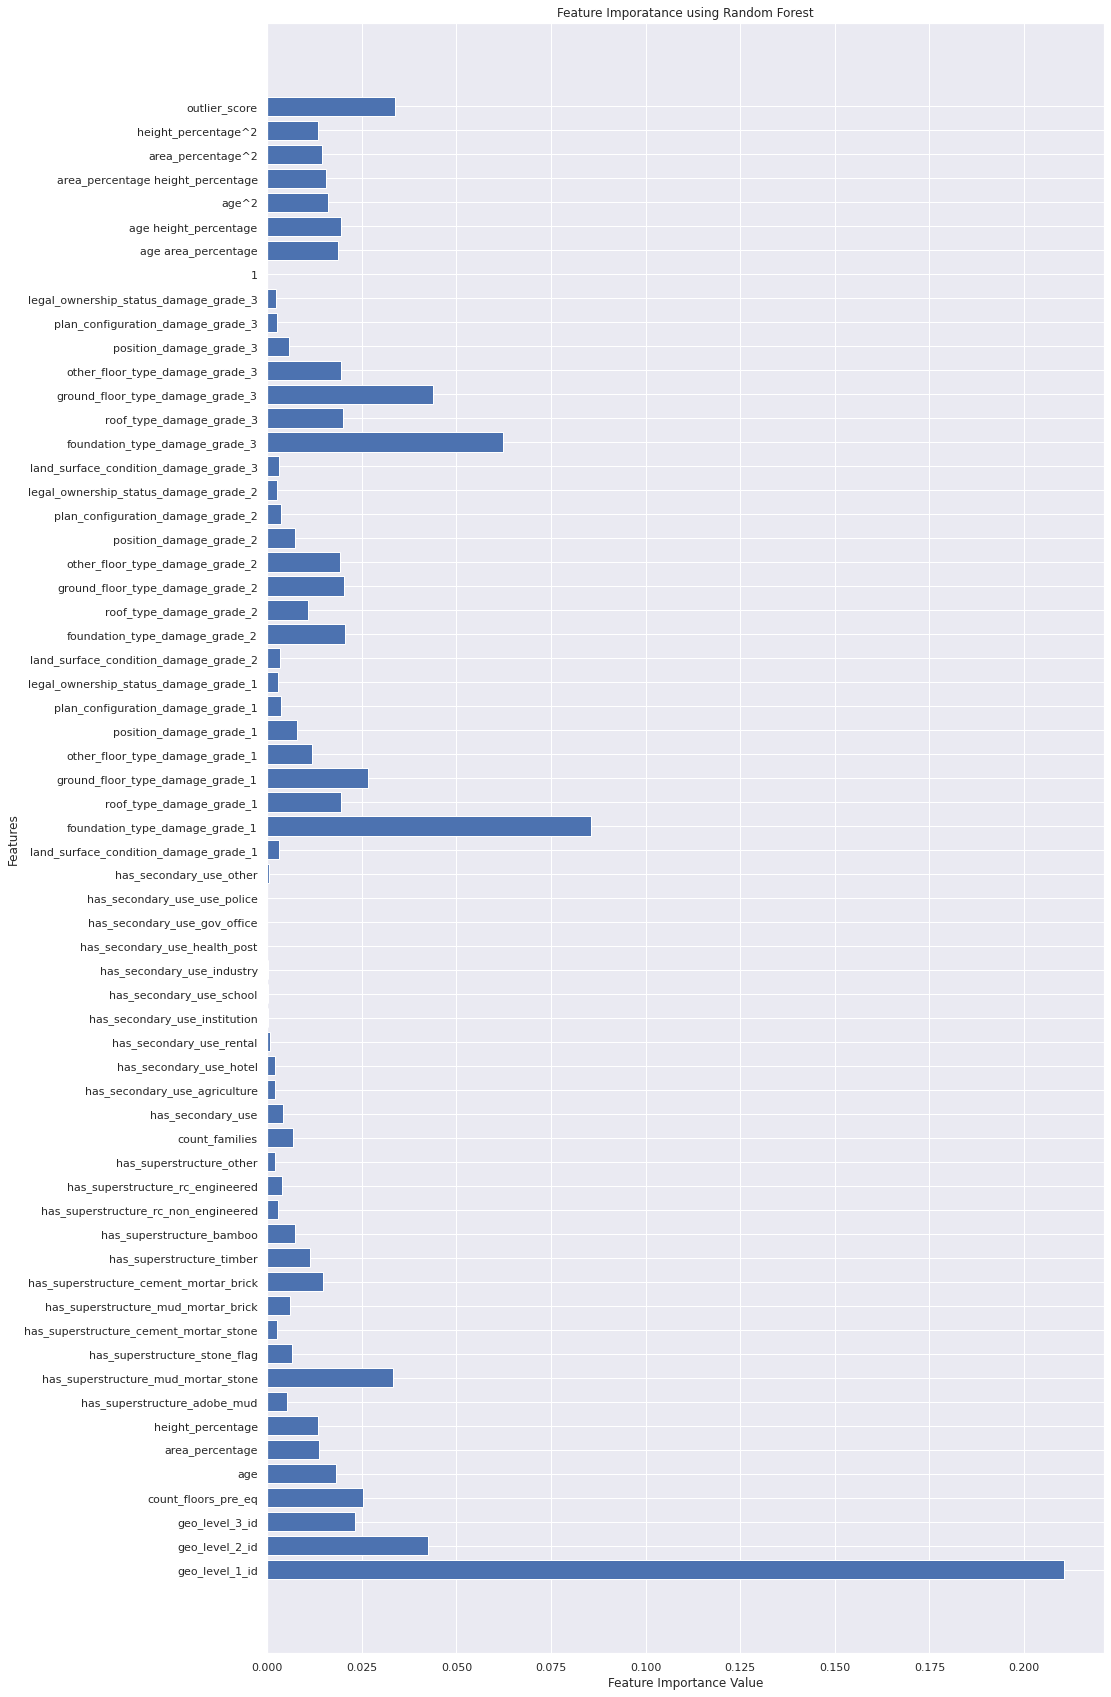

In [29]:
rf = RandomForestClassifier(n_estimators=100, max_depth=12)
show_importance(X_iso, y, rf, "Random Forest")

##### Feature Importance using XGBoost

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


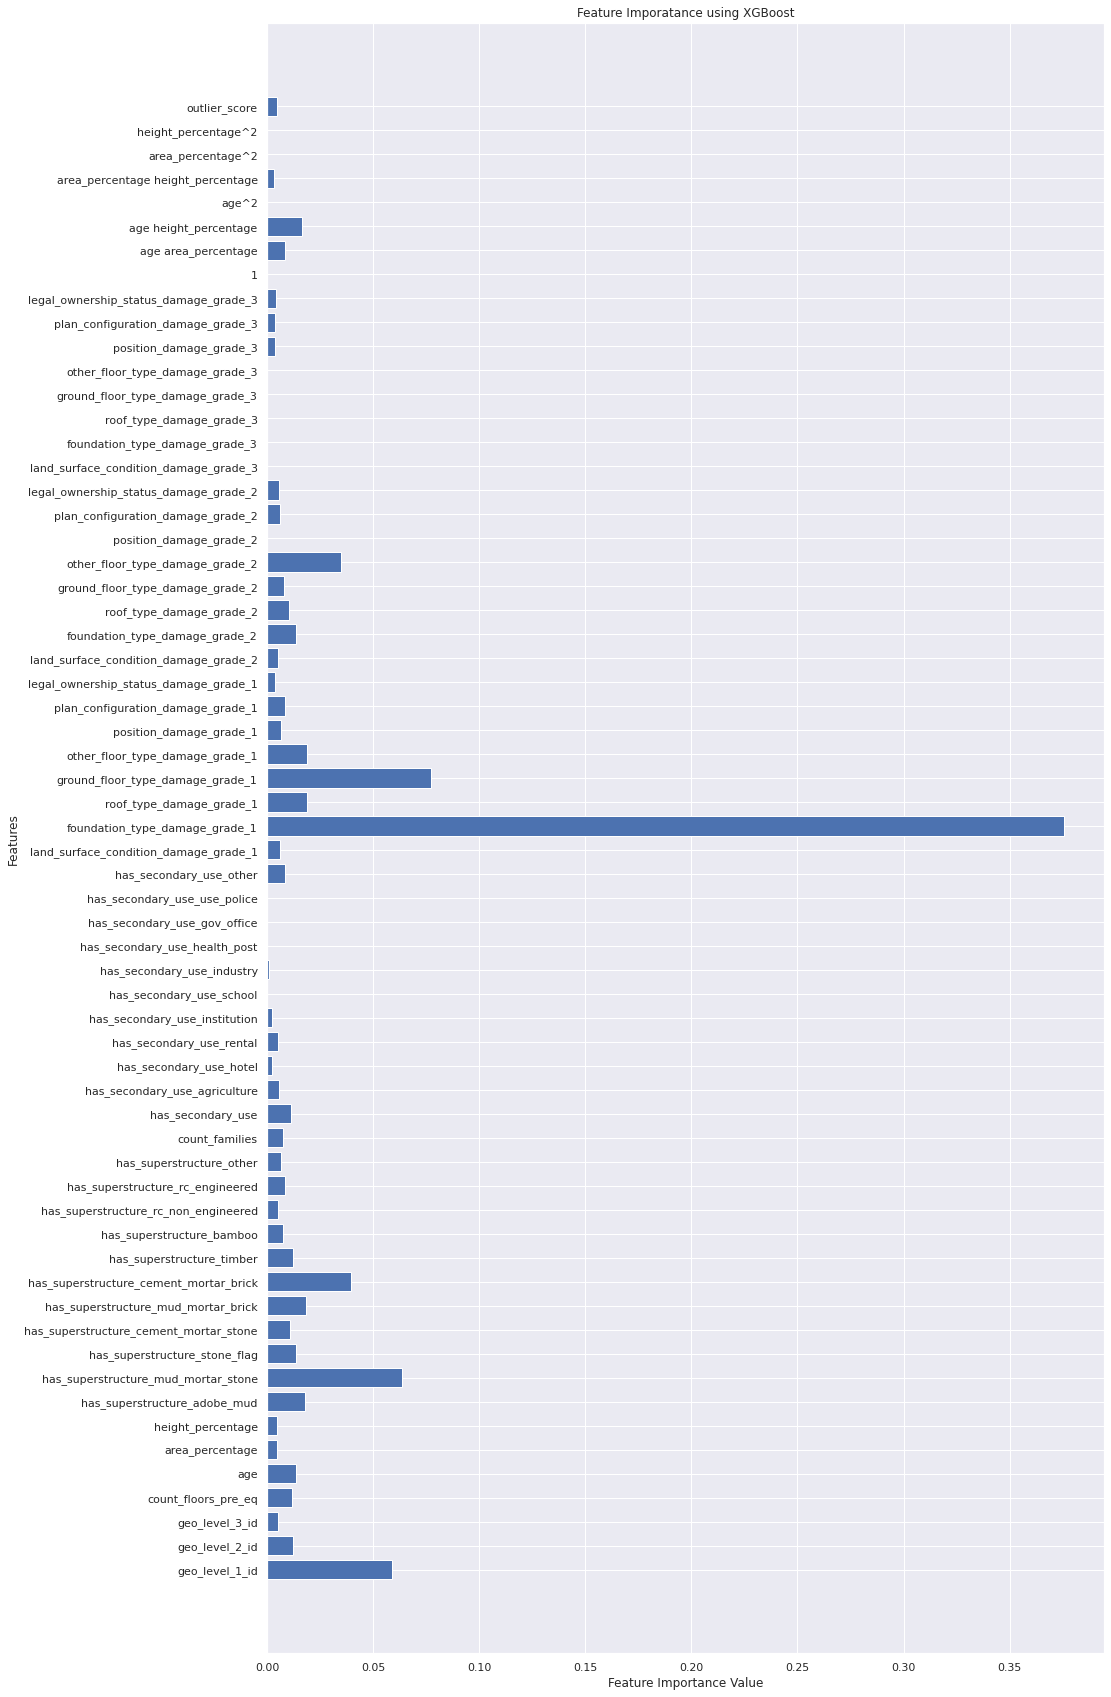

In [30]:
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None

xgb = MyXGBClassifier(max_depth=6)
show_importance(X_iso, y, xgb, "XGBoost")

##### Feature Importance using LightGradientBoosting

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


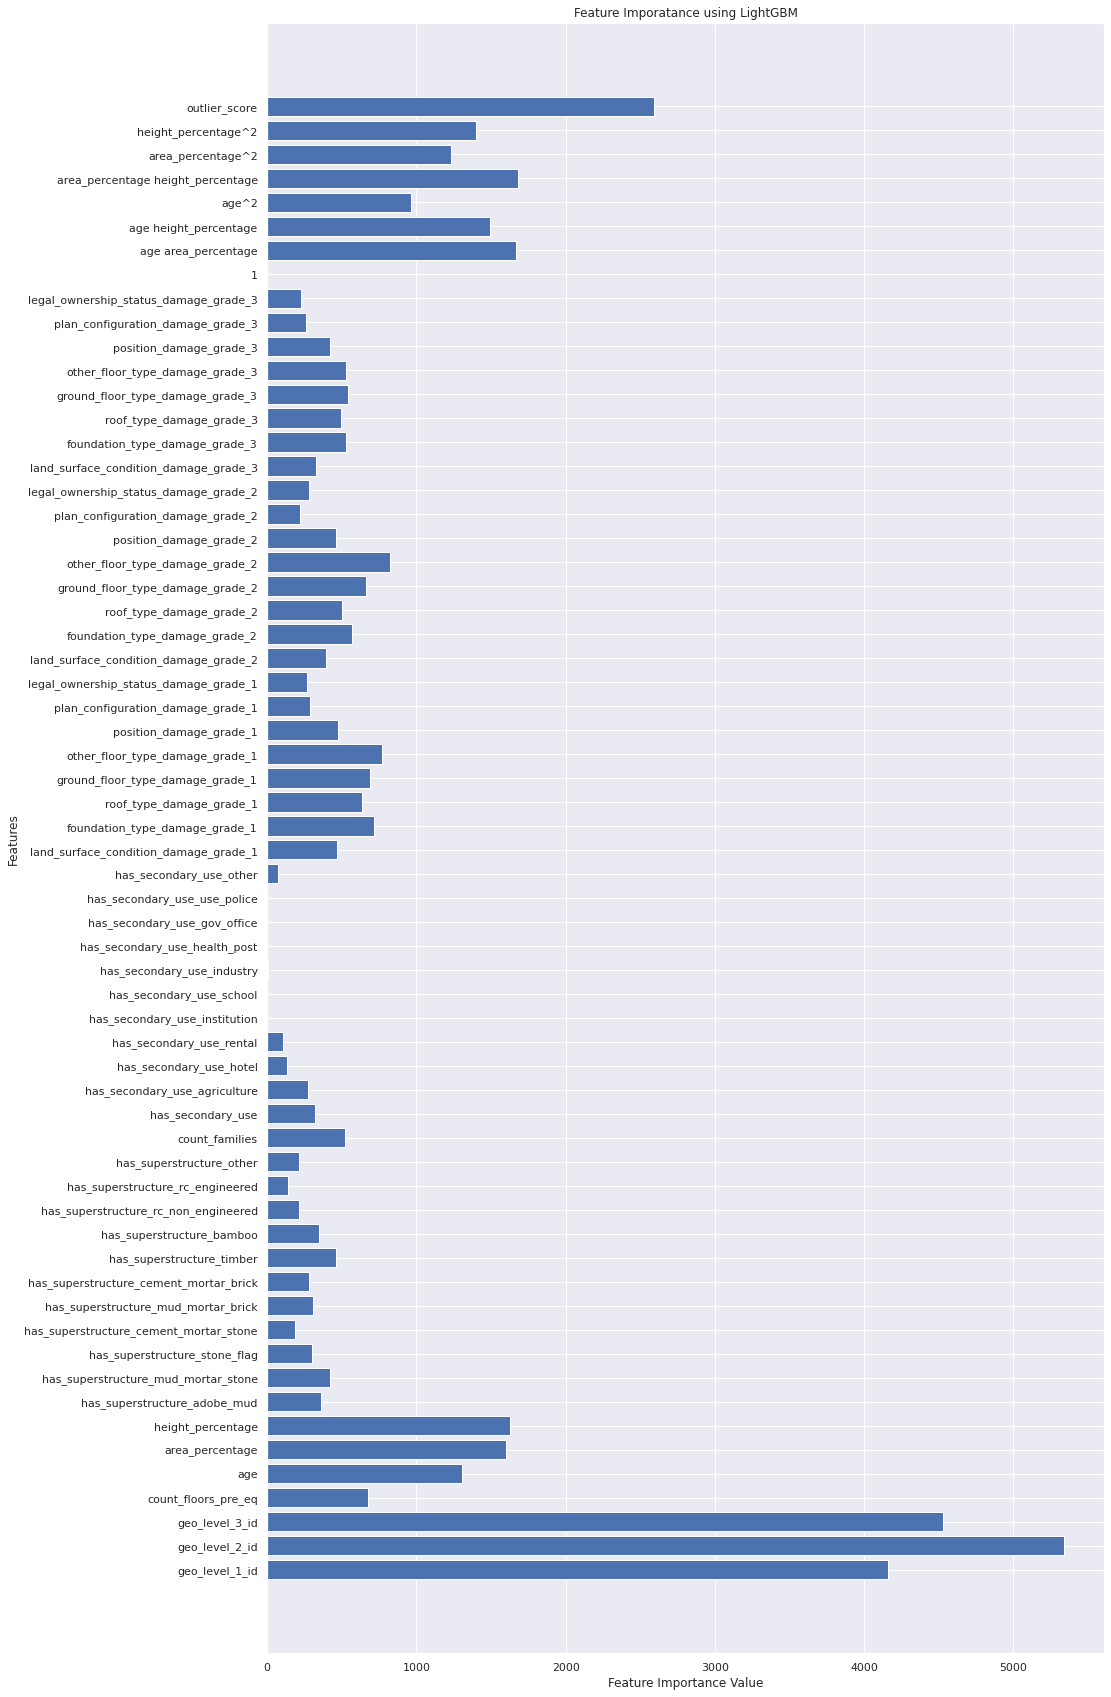

In [31]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel

lgb=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

show_importance(X_iso, y, lgb, "LightGBM")

---
### Feature Selection

In [32]:
from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, max_depth=12), max_features=40)
embeded_xgb_selector = SelectFromModel(MyXGBClassifier(max_depth=6), max_features=40)
embeded_lgbm_selector = SelectFromModel(LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40), max_features=40)

##### Feature Selection with Random Forest

In [33]:
embeded_rf_selector.fit(X_iso, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_iso.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


19 selected features


##### Feature Selection with XGBoost

In [34]:
embeded_xgb_selector.fit(X_iso, y)

embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = X_iso.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_xgb_feature)), 'selected features')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11 selected features


##### Feature Selection with LightGradientBoosting

In [35]:
embeded_lgbm_selector.fit(X_iso, y)

embeded_lgbm_support = embeded_lgbm_selector.get_support()
embeded_lgbm_feature = X_iso.loc[:,embeded_lgbm_support].columns.tolist()
print(str(len(embeded_lgbm_feature)), 'selected features')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15 selected features


In [36]:
features = []

for column in X_iso:
    features.append(column)

feature_selection_df = pd.DataFrame({'Feature':features, 'Random Forest':embeded_rf_support, 'XGBoost':embeded_xgb_support,
                                    'LGBM':embeded_lgbm_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(20)

,Feature,Random Forest,XGBoost,LGBM,Total
1,geo_level_1_id,True,True,True,3
2,age height_percentage,True,True,True,3
3,roof_type_damage_grade_1,True,True,False,2
4,outlier_score,True,False,True,2
5,other_floor_type_damage_grade_2,False,True,True,2
6,other_floor_type_damage_grade_1,False,True,True,2
7,has_superstructure_mud_mortar_stone,True,True,False,2
8,ground_floor_type_damage_grade_1,True,True,False,2
9,geo_level_3_id,True,False,True,2
10,geo_level_2_id,True,False,True,2


In [37]:
important_features =[]
for i in range(1,len(feature_selection_df)+1,1):
    if feature_selection_df['Total'][i]>0:
        important_features.append(feature_selection_df['Feature'].values[i-1])
    
print(important_features)

['geo_level_1_id', 'age height_percentage', 'roof_type_damage_grade_1', 'outlier_score', 'other_floor_type_damage_grade_2', 'other_floor_type_damage_grade_1', 'has_superstructure_mud_mortar_stone', 'ground_floor_type_damage_grade_1', 'geo_level_3_id', 'geo_level_2_id', 'foundation_type_damage_grade_1', 'age area_percentage', 'age', 'roof_type_damage_grade_3', 'roof_type_damage_grade_2', 'other_floor_type_damage_grade_3', 'height_percentage^2', 'height_percentage', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_adobe_mud', 'ground_floor_type_damage_grade_3', 'ground_floor_type_damage_grade_2', 'foundation_type_damage_grade_3', 'foundation_type_damage_grade_2', 'count_floors_pre_eq', 'area_percentage^2', 'area_percentage height_percentage', 'area_percentage', 'age^2']


In [38]:
important_columns = pd.DataFrame()
final_test_df = pd.DataFrame()

for column in important_features:
    important_columns[column] = X_iso[column]
    final_test_df[column] = test_iso[column]
    
important_columns["damage_grade"] = y["damage_grade"]

important_columns.head()

,geo_level_1_id,age height_percentage,roof_type_damage_grade_1,outlier_score,other_floor_type_damage_grade_2,other_floor_type_damage_grade_1,has_superstructure_mud_mortar_stone,ground_floor_type_damage_grade_1,geo_level_3_id,geo_level_2_id,foundation_type_damage_grade_1,age area_percentage,age,roof_type_damage_grade_3,roof_type_damage_grade_2,other_floor_type_damage_grade_3,height_percentage^2,height_percentage,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,ground_floor_type_damage_grade_3,ground_floor_type_damage_grade_2,foundation_type_damage_grade_3,foundation_type_damage_grade_2,count_floors_pre_eq,area_percentage^2,area_percentage height_percentage,area_percentage,age^2,damage_grade
0,6,150.0,0.343728,0.132853,0.594862,0.360445,1,0.368612,12198,487,0.378479,180.0,30,0.074091,0.58218,0.044693,25.0,5,0,0,1,0.059508,0.571880,0.048906,0.572615,2,36.0,30.0,6,900.0,3
1,8,70.0,0.343728,0.121162,0.594862,0.360445,1,0.333199,2812,900,0.378479,80.0,10,0.074091,0.58218,0.044693,49.0,7,0,0,0,0.082486,0.584315,0.048906,0.572615,2,64.0,56.0,8,100.0,2
2,21,50.0,0.343728,0.151625,0.544858,0.376243,1,0.368612,8973,363,0.378479,50.0,10,0.074091,0.58218,0.078899,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,25.0,25.0,5,100.0,3
3,22,50.0,0.343728,0.132858,0.544858,0.376243,1,0.368612,10694,418,0.378479,60.0,10,0.074091,0.58218,0.078899,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,36.0,30.0,6,100.0,2
4,11,270.0,0.343728,0.113076,0.544858,0.376243,0,0.368612,1488,131,0.378479,240.0,30,0.074091,0.58218,0.078899,81.0,9,0,0,1,0.059508,0.571880,0.048906,0.572615,3,64.0,72.0,8,900.0,3


In [39]:
print('train shape: ', important_columns.shape)
print('test shape: ', final_test_df.shape)

train shape:  (260601, 31)
test shape:  (86868, 30)


---
### Check the distibution of Train and Test data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

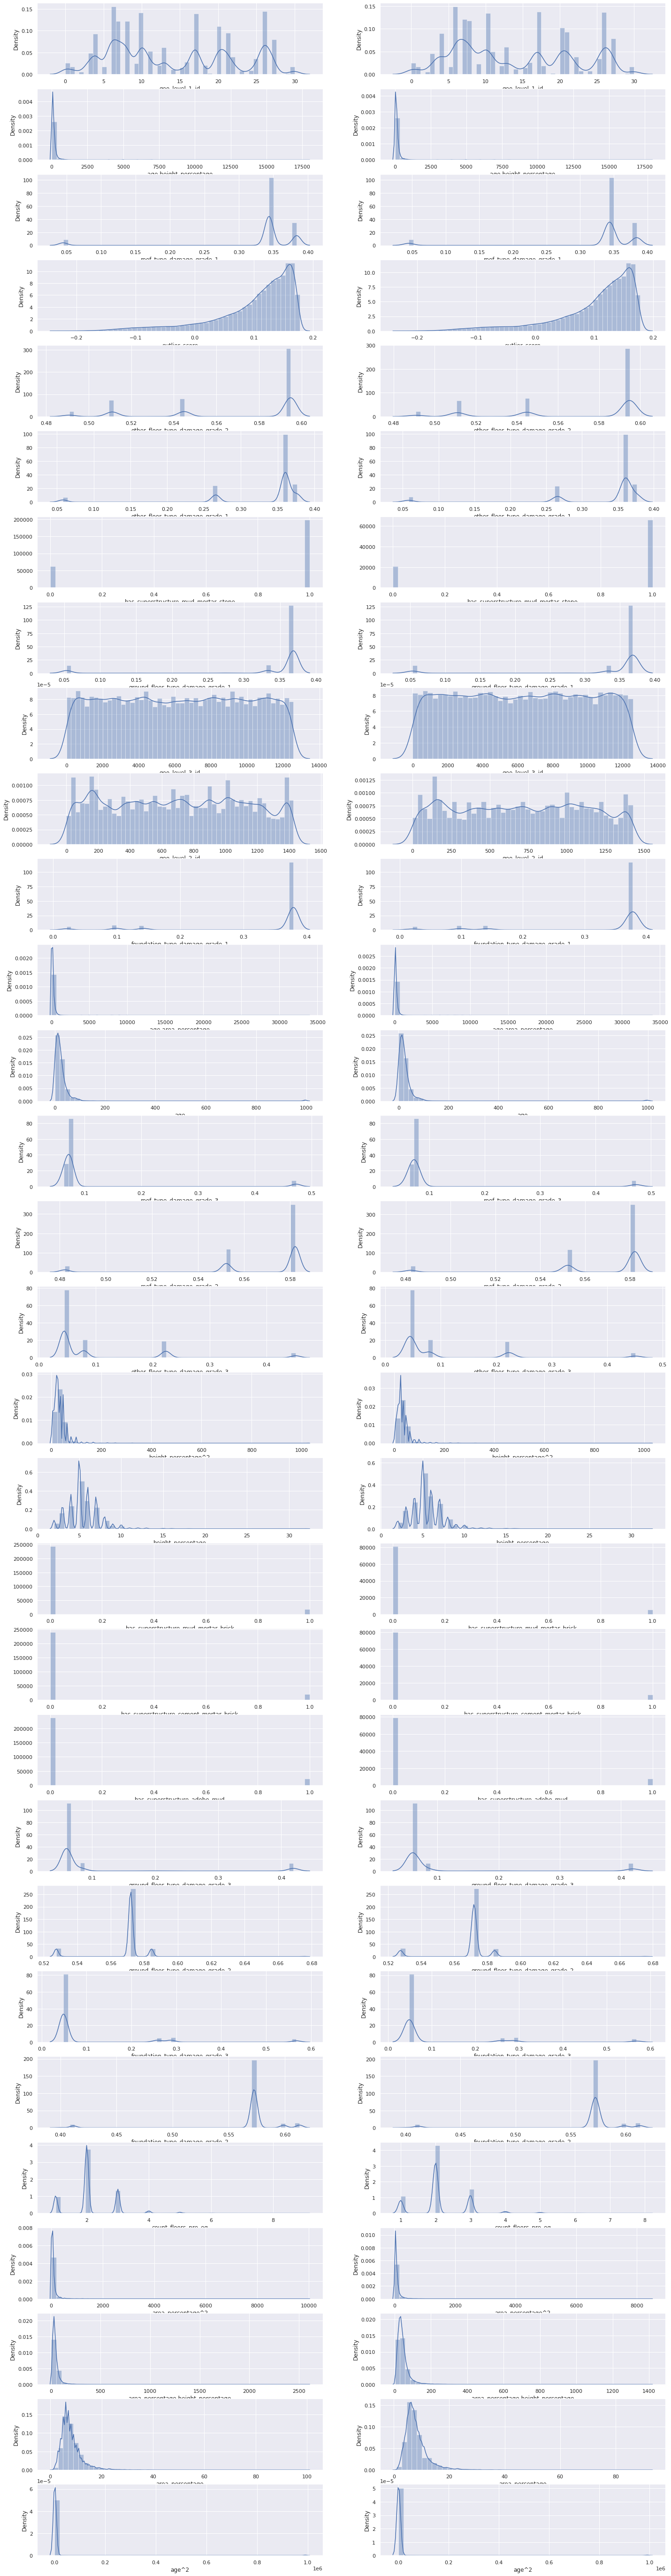

In [40]:
f, axes = plt.subplots(final_test_df.shape[1], 2, figsize=(24, 100))
for x, column in enumerate(important_columns.columns[:-1]):
    if important_columns[column].nunique() > 2:
        show_kde = True
    else:
        show_kde = False
    sb.distplot(important_columns[column], kde = show_kde, ax = axes[x][0])
    sb.distplot(final_test_df[column], kde = show_kde, ax = axes[x][1])

### Inference
Both the train and test set have similar distributions for the predictors

---

In [41]:
important_columns.to_csv("final_train.csv", index=False)
final_test_df.to_csv("final_test.csv", index=False)

In [42]:
PATH = ''
important_columns = pd.read_csv(PATH + 'final_train.csv')
final_test_df = pd.read_csv(PATH + 'final_test.csv')

---
### Encoding the Geo Locations using LSTM

In [43]:
geo_1 = pd.concat([important_columns['geo_level_1_id'], final_test_df['geo_level_1_id']]).to_numpy().reshape(-1,1)
geo_2 = pd.concat([important_columns['geo_level_2_id'], final_test_df['geo_level_2_id']]).to_numpy().reshape(-1,1)
geo_3 = pd.concat([important_columns['geo_level_3_id'], final_test_df['geo_level_3_id']])

In [44]:
print(geo_1.shape)
print(geo_2.shape)
print(geo_3.shape)

(347469, 1)
(347469, 1)
(347469,)


In [45]:
lstm_inp = np.stack((geo_1, geo_2), axis=1)

In [46]:
print(lstm_inp.shape)

(347469, 2, 1)


In [47]:
geo_3_enc = np.array(pd.get_dummies(geo_3))

In [48]:
print(geo_3_enc.shape)

(347469, 11861)


In [49]:
inpx = Input(shape=lstm_inp.shape[1:])  
lstm = LSTM(20, )(inpx)
lvl3 = Dense(geo_3_enc.shape[1], activation='sigmoid')(lstm)
modelf = Model(inputs= inpx, outputs=lvl3)
modelf.compile(loss='binary_crossentropy', optimizer='adam')
modelf.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 11861)             249081    
Total params: 250,841
Trainable params: 250,841
Non-trainable params: 0
_________________________________________________________________


In [50]:
modelf.fit(lstm_inp, geo_3_enc, epochs=10, batch_size=64)

Epoch 1/10
5430/5430 [==============================] - 40s 6ms/step - loss: 0.0674
Epoch 2/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.4850e-04
Epoch 3/10
5430/5430 [==============================] - 34s 6ms/step - loss: 8.3224e-04
Epoch 4/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.3091e-04
Epoch 5/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.3081e-04
Epoch 6/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.3054e-04
Epoch 7/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.2528e-04
Epoch 8/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.1799e-04
Epoch 9/10
5430/5430 [==============================] - 33s 6ms/step - loss: 8.1071e-04
Epoch 10/10
5430/5430 [==============================] - 32s 6ms/step - loss: 8.0425e-04


In [51]:
intermediate = Model(inputs=modelf.input, outputs=modelf.layers[1].output)

In [52]:
g1_train = important_columns['geo_level_1_id'].to_numpy().reshape(-1,1)
g2_train = important_columns['geo_level_2_id'].to_numpy().reshape(-1,1)

In [53]:
train_inp = np.stack((g1_train, g2_train), axis=1)
geo_fea_train = intermediate.predict(train_inp)

In [54]:
g1_test = final_test_df['geo_level_1_id'].to_numpy().reshape(-1,1)
g2_test = final_test_df['geo_level_2_id'].to_numpy().reshape(-1,1)

In [55]:
test_inp = np.stack((g1_test, g2_test), axis=1)

In [56]:
geo_fea_test = intermediate.predict(test_inp)

In [57]:
print(geo_fea_train.shape)
print(geo_fea_test.shape)

(260601, 20)
(86868, 20)


In [58]:
g_train = pd.DataFrame(geo_fea_train)
g_test = pd.DataFrame(geo_fea_test)

In [59]:
g_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000094,0.848744,0.963972,-0.964006,0.931444,-0.963986,0.953315,0.953238,-0.957883,0.813999,-0.963900,-0.963986,0.963912,-0.963961,-0.762949,0.964021,-0.964014,0.964001,-0.963962,0.947096
1,0.001110,0.849886,0.964019,-0.964025,0.931884,-0.964022,0.953522,0.953409,-0.957970,0.756340,-0.964010,-0.964022,0.964013,-0.964018,-0.763754,0.964027,-0.964026,0.964024,-0.964019,0.961661
2,0.964016,0.852756,0.964028,-0.964028,0.932369,-0.964028,0.953516,0.953589,-0.958192,0.734684,-0.964028,-0.964028,0.964028,-0.964028,-0.008870,0.964028,-0.964028,0.964028,-0.964028,0.964028
3,0.964025,0.853783,0.964028,-0.964028,0.932555,-0.964028,0.953602,0.953640,-0.958225,0.722533,-0.964028,-0.964028,0.964028,-0.964028,-0.009095,0.964028,-0.964028,0.964028,-0.964028,0.964028
4,0.053939,0.846328,0.964027,-0.964028,0.931248,-0.964027,0.953143,0.953134,-0.957854,0.841531,-0.964027,-0.964027,0.964027,-0.964027,-0.761858,0.964028,-0.964028,0.964027,-0.964027,0.963891


In [60]:
g_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.961960,0.852874,0.964028,-0.964028,0.932384,-0.964028,0.953607,0.953581,-0.958146,0.681773,-0.964028,-0.964028,0.964028,-0.964028,-0.010227,0.964028,-0.964028,0.964028,-0.964028,0.964027
1,0.000094,0.844406,0.963972,-0.964006,0.930788,-0.963986,0.952977,0.952993,-0.957743,0.840984,-0.963900,-0.963986,0.963912,-0.963961,-0.761777,0.964021,-0.964014,0.964001,-0.963962,0.947096
2,0.957507,0.832885,0.963856,-0.964015,0.931254,-0.963949,0.952889,0.953324,-0.958036,0.793582,-0.964018,-0.963972,0.963910,-0.963948,-0.007912,0.964027,-0.964015,0.963987,-0.963965,0.964011
3,0.964015,0.837514,0.963995,-0.964027,0.931698,-0.964023,0.953058,0.953458,-0.958145,0.790307,-0.964028,-0.964025,0.964018,-0.964023,-0.008010,0.964028,-0.964027,0.964027,-0.964025,0.964028
4,0.961960,0.849862,0.964028,-0.964028,0.931870,-0.964028,0.953313,0.953446,-0.958087,0.751381,-0.964028,-0.964028,0.964028,-0.964028,-0.008759,0.964028,-0.964028,0.964028,-0.964028,0.964027


In [61]:
train = pd.concat([g_train, important_columns], axis=1)
test = pd.concat([g_test, final_test_df], axis=1)

In [62]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,geo_level_1_id,age height_percentage,roof_type_damage_grade_1,outlier_score,other_floor_type_damage_grade_2,other_floor_type_damage_grade_1,has_superstructure_mud_mortar_stone,ground_floor_type_damage_grade_1,geo_level_3_id,geo_level_2_id,foundation_type_damage_grade_1,age area_percentage,age,roof_type_damage_grade_3,roof_type_damage_grade_2,other_floor_type_damage_grade_3,height_percentage^2,height_percentage,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,ground_floor_type_damage_grade_3,ground_floor_type_damage_grade_2,foundation_type_damage_grade_3,foundation_type_damage_grade_2,count_floors_pre_eq,area_percentage^2,area_percentage height_percentage,area_percentage,age^2,damage_grade
0,0.000094,0.848744,0.963972,-0.964006,0.931444,-0.963986,0.953315,0.953238,-0.957883,0.813999,-0.963900,-0.963986,0.963912,-0.963961,-0.762949,0.964021,-0.964014,0.964001,-0.963962,0.947096,6,150.0,0.343728,0.132853,0.594862,0.360445,1,0.368612,12198,487,0.378479,180.0,30,0.074091,0.58218,0.044693,25.0,5,0,0,1,0.059508,0.571880,0.048906,0.572615,2,36.0,30.0,6,900.0,3
1,0.001110,0.849886,0.964019,-0.964025,0.931884,-0.964022,0.953522,0.953409,-0.957970,0.756340,-0.964010,-0.964022,0.964013,-0.964018,-0.763754,0.964027,-0.964026,0.964024,-0.964019,0.961661,8,70.0,0.343728,0.121162,0.594862,0.360445,1,0.333199,2812,900,0.378479,80.0,10,0.074091,0.58218,0.044693,49.0,7,0,0,0,0.082486,0.584315,0.048906,0.572615,2,64.0,56.0,8,100.0,2
2,0.964016,0.852756,0.964028,-0.964028,0.932369,-0.964028,0.953516,0.953589,-0.958192,0.734684,-0.964028,-0.964028,0.964028,-0.964028,-0.008870,0.964028,-0.964028,0.964028,-0.964028,0.964028,21,50.0,0.343728,0.151625,0.544858,0.376243,1,0.368612,8973,363,0.378479,50.0,10,0.074091,0.58218,0.078899,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,25.0,25.0,5,100.0,3
3,0.964025,0.853783,0.964028,-0.964028,0.932555,-0.964028,0.953602,0.953640,-0.958225,0.722533,-0.964028,-0.964028,0.964028,-0.964028,-0.009095,0.964028,-0.964028,0.964028,-0.964028,0.964028,22,50.0,0.343728,0.132858,0.544858,0.376243,1,0.368612,10694,418,0.378479,60.0,10,0.074091,0.58218,0.078899,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,36.0,30.0,6,100.0,2
4,0.053939,0.846328,0.964027,-0.964028,0.931248,-0.964027,0.953143,0.953134,-0.957854,0.841531,-0.964027,-0.964027,0.964027,-0.964027,-0.761858,0.964028,-0.964028,0.964027,-0.964027,0.963891,11,270.0,0.343728,0.113076,0.544858,0.376243,0,0.368612,1488,131,0.378479,240.0,30,0.074091,0.58218,0.078899,81.0,9,0,0,1,0.059508,0.571880,0.048906,0.572615,3,64.0,72.0,8,900.0,3


In [63]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,geo_level_1_id,age height_percentage,roof_type_damage_grade_1,outlier_score,other_floor_type_damage_grade_2,other_floor_type_damage_grade_1,has_superstructure_mud_mortar_stone,ground_floor_type_damage_grade_1,geo_level_3_id,geo_level_2_id,foundation_type_damage_grade_1,age area_percentage,age,roof_type_damage_grade_3,roof_type_damage_grade_2,other_floor_type_damage_grade_3,height_percentage^2,height_percentage,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_adobe_mud,ground_floor_type_damage_grade_3,ground_floor_type_damage_grade_2,foundation_type_damage_grade_3,foundation_type_damage_grade_2,count_floors_pre_eq,area_percentage^2,area_percentage height_percentage,area_percentage,age^2
0,0.961960,0.852874,0.964028,-0.964028,0.932384,-0.964028,0.953607,0.953581,-0.958146,0.681773,-0.964028,-0.964028,0.964028,-0.964028,-0.010227,0.964028,-0.964028,0.964028,-0.964028,0.964027,17,120.0,0.343728,0.170715,0.594862,0.360445,1,0.368612,11307,596,0.378479,140.0,20,0.074091,0.582180,0.044693,36.0,6,0,0,0,0.059508,0.571880,0.048906,0.572615,3,49.0,42.0,7,400.0
1,0.000094,0.844406,0.963972,-0.964006,0.930788,-0.963986,0.952977,0.952993,-0.957743,0.840984,-0.963900,-0.963986,0.963912,-0.963961,-0.761777,0.964021,-0.964014,0.964001,-0.963962,0.947096,6,125.0,0.343728,0.115369,0.594862,0.360445,1,0.368612,11987,141,0.378479,325.0,25,0.074091,0.582180,0.044693,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,169.0,65.0,13,625.0
2,0.957507,0.832885,0.963856,-0.964015,0.931254,-0.963949,0.952889,0.953324,-0.958036,0.793582,-0.964018,-0.963972,0.963910,-0.963948,-0.007912,0.964027,-0.964015,0.963987,-0.963965,0.964011,22,25.0,0.343728,0.162677,0.594862,0.360445,1,0.368612,10044,19,0.378479,20.0,5,0.074091,0.582180,0.044693,25.0,5,0,0,0,0.059508,0.571880,0.048906,0.572615,2,16.0,20.0,4,25.0
3,0.964015,0.837514,0.963995,-0.964027,0.931698,-0.964023,0.953058,0.953458,-0.958145,0.790307,-0.964028,-0.964025,0.964018,-0.964023,-0.008010,0.964028,-0.964027,0.964027,-0.964025,0.964028,26,0.0,0.045047,-0.082784,0.511056,0.265919,0,0.053389,633,39,0.378479,0.0,0,0.472780,0.482173,0.223025,9.0,3,0,1,0,0.419184,0.527427,0.048906,0.572615,1,361.0,57.0,19,0.0
4,0.961960,0.849862,0.964028,-0.964028,0.931870,-0.964028,0.953313,0.953446,-0.958087,0.751381,-0.964028,-0.964028,0.964028,-0.964028,-0.008759,0.964028,-0.964028,0.964028,-0.964028,0.964027,17,105.0,0.383932,0.142335,0.594862,0.360445,1,0.368612,7970,289,0.378479,120.0,15,0.063759,0.552309,0.044693,49.0,7,0,0,0,0.059508,0.571880,0.048906,0.572615,3,64.0,56.0,8,225.0


In [64]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)